## Import thư viện

In [20]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns
from itertools import chain
from collections import Counter
from wordcloud import WordCloud
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

In [21]:
movies_df = pd.read_csv('./data/processed/processed_data.csv')
movies_df.head(5)

,title,domestic_revenue,world_revenue,distributor,opening_revenue,MPAA,genres,in_release,release_date
0,The Talented Mr. Ripley,81298265,128798265,Paramount Pictures,12738237.0,R,"Crime,Drama,Thriller",373.0,1999-12-25
1,One False Move,1543112,1543112,IRS Media,44545.0,R,"Crime,Drama,Thriller",238.0,1992-05-08
2,Galaxy Quest,71583916,90683916,DreamWorks Distribution,7012630.0,PG,"Adventure,Comedy,Sci-Fi",373.0,1999-12-25
3,Hero,53710019,177395557,Miramax,17800000.0,PG-13,"Action,Adventure,Drama",133.0,2004-08-27
4,Zebrahead,1557771,1557771,Triumph Releasing Corporation,609041.0,R,"Drama,Romance",70.0,1992-10-23


### Hãng phim

In [22]:
distributor = movies_df['distributor'].value_counts().to_dict()
distributor

{'Warner Bros.': 572,
 'Universal Pictures': 458,
 'Walt Disney Studios Motion Pictures': 406,
 'Twentieth Century Fox': 404,
 'Sony Pictures Entertainment (SPE)': 357,
 'Paramount Pictures': 338,
 'Lions Gate Films': 236,
 'Miramax': 161,
 'New Line Cinema': 159,
 'Metro-Goldwyn-Mayer (MGM)': 117,
 'Sony Pictures Classics': 92,
 'Focus Features': 91,
 'Fox Searchlight': 85,
 'Screen Gems': 73,
 'TriStar Pictures': 54,
 'DreamWorks Distribution': 53,
 'Columbia Pictures': 44,
 'Roadside Attractions': 42,
 'Open Road Films (II)': 42,
 'Dimension Films': 37,
 'Revolution Studios': 35,
 'DreamWorks': 35,
 'STX Entertainment': 34,
 'The Weinstein Company': 32,
 'Relativity Media': 31,
 'Gramercy Pictures (I)': 29,
 'The Samuel Goldwyn Company': 29,
 'Bleecker Street Media': 25,
 'Summit Entertainment': 25,
 'A24': 25,
 'Neon': 24,
 'Fine Line Features': 22,
 'Artisan Entertainment': 21,
 'United Artists Releasing': 20,
 'IFC Films': 20,
 'Orion Pictures': 17,
 'Rogue Pictures': 15,
 'MGM/W

### Phân loại phim

In [23]:
mpaa = movies_df['MPAA'].value_counts().to_dict()
mpaa

{'R': 2045,
 'PG-13': 1823,
 'PG': 837,
 'G': 45,
 'NC-17': 6,
 'Not Rated': 2,
 'TV-14': 1,
 'Approved': 1}

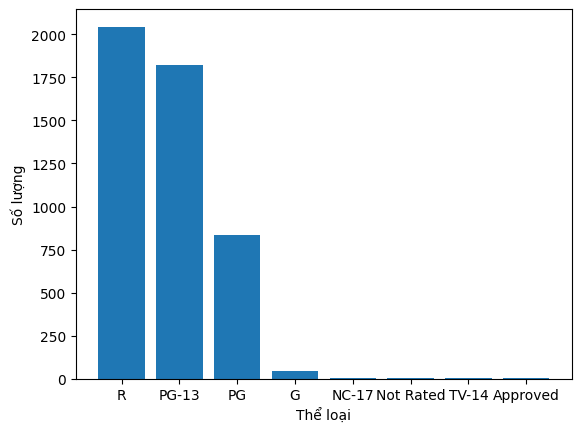

In [24]:
plt.bar(range(len(mpaa)), list(mpaa.values()), align='center')
plt.xticks(range(len(mpaa)), list(mpaa.keys()))

plt.xlabel('Thể loại')
plt.ylabel('Số lượng')
plt.show()

### Thể loại

In [25]:
components = movies_df['genres'].str.split(',').tolist() 
temp_list = list(chain.from_iterable(components)) 
genres_counter = Counter(temp_list)
genres_dict = dict(genres_counter)
genres_dict

{'Crime': 929,
 'Drama': 2357,
 'Thriller': 1490,
 'Adventure': 1039,
 'Comedy': 2016,
 'Sci-Fi': 651,
 'Action': 1343,
 'Romance': 1081,
 'Musical': 110,
 'Documentary': 112,
 'Mystery': 636,
 'Music': 220,
 'Animation': 258,
 'Fantasy': 695,
 'History': 169,
 'Horror': 534,
 'War': 148,
 'Biography': 313,
 'Family': 628,
 'Western': 64,
 'Sport': 209,
 'News': 2,
 'Film-Noir': 1,
 'Short': 1}

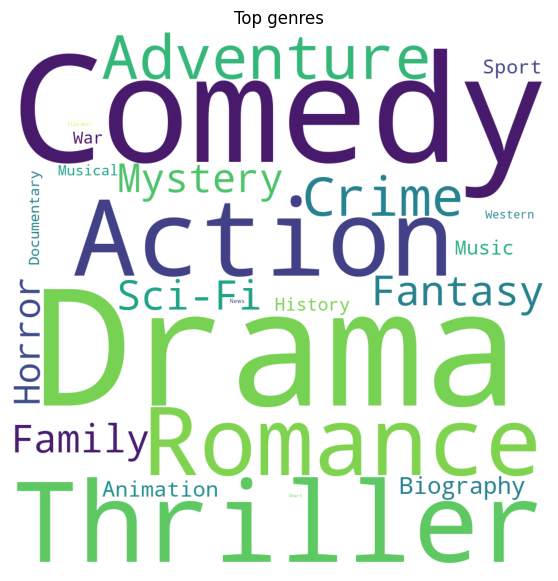

In [26]:
plt.figure(figsize = (7, 7))
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=len(genres_dict),relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(genres_dict)
plt.imshow(wc)
plt.title('Top genres')
plt.axis("off")
plt.show()

### Ngày ra mắt

In [27]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d')
film_counts = movies_df['release_date'].dt.year.value_counts().sort_index()

# Create a plot
fig = px.line(x=film_counts.index, y=film_counts.values, 
              labels={'x': 'Năm', 'y': 'Số lượng'},
              title='Số lượng phim hằng năm')

fig.show()